<a href="https://colab.research.google.com/github/enjolimarie/Projects-in-AI-ML/blob/main/Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1 (30 points): Implement a Decision Tree Classifier for your classification problem. You
may use a built-in package to implement your classifier. Additionally, do the following:
1. Visualize the decision tree structure for at least three different parameter settings.
Comment on how the depth and complexity change the tree.
2. Do some research on what sensitivity analysis is and how it is performed (include
citations). Perform a sensitivity analysis to measure the impact of at least two input
features on your model's decision boundary.

Importing the Data and Splitting Testing and Training before making the Decision Tree

In [29]:
#Heart Disease Dataset: https://www.kaggle.com/datasets/yasserh/heart-disease-dataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, make_scorer, confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns
from scipy.stats import ttest_rel
import xgboost as xgb

#Loading data
data_path = '/content/heart.csv'
data = pd.read_csv(data_path)

print(data.head)

#Defining feature var X(features) and target var y
X = data.drop('target', axis=1)
y = data['target']

#Splitting data into training and testing sets with an 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<bound method NDFrame.head of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2  

In [2]:
#Training and evaluating the decision Tree
def train_evaluate_decision_tree(max_depth=None, min_samples_split=2, min_samples_leaf=1):
    clf = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print(f"Decision Tree:  max_depth={max_depth}, min_samples_split={min_samples_split}, min_samples_leaf={min_samples_leaf}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report: ")
    print(classification_report(y_test, y_pred))
    return clf

#Training with default parameters
clf_default = train_evaluate_decision_tree()


Decision Tree with max_depth=None, min_samples_split=2, min_samples_leaf=1
Accuracy: 0.9854
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



Implementation of the Decision Tree:

Decision Tree with max_depth=3, min_samples_split=2, min_samples_leaf=1
Accuracy: 0.7805
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.68      0.75       102
           1       0.73      0.88      0.80       103

    accuracy                           0.78       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.78      0.78       205



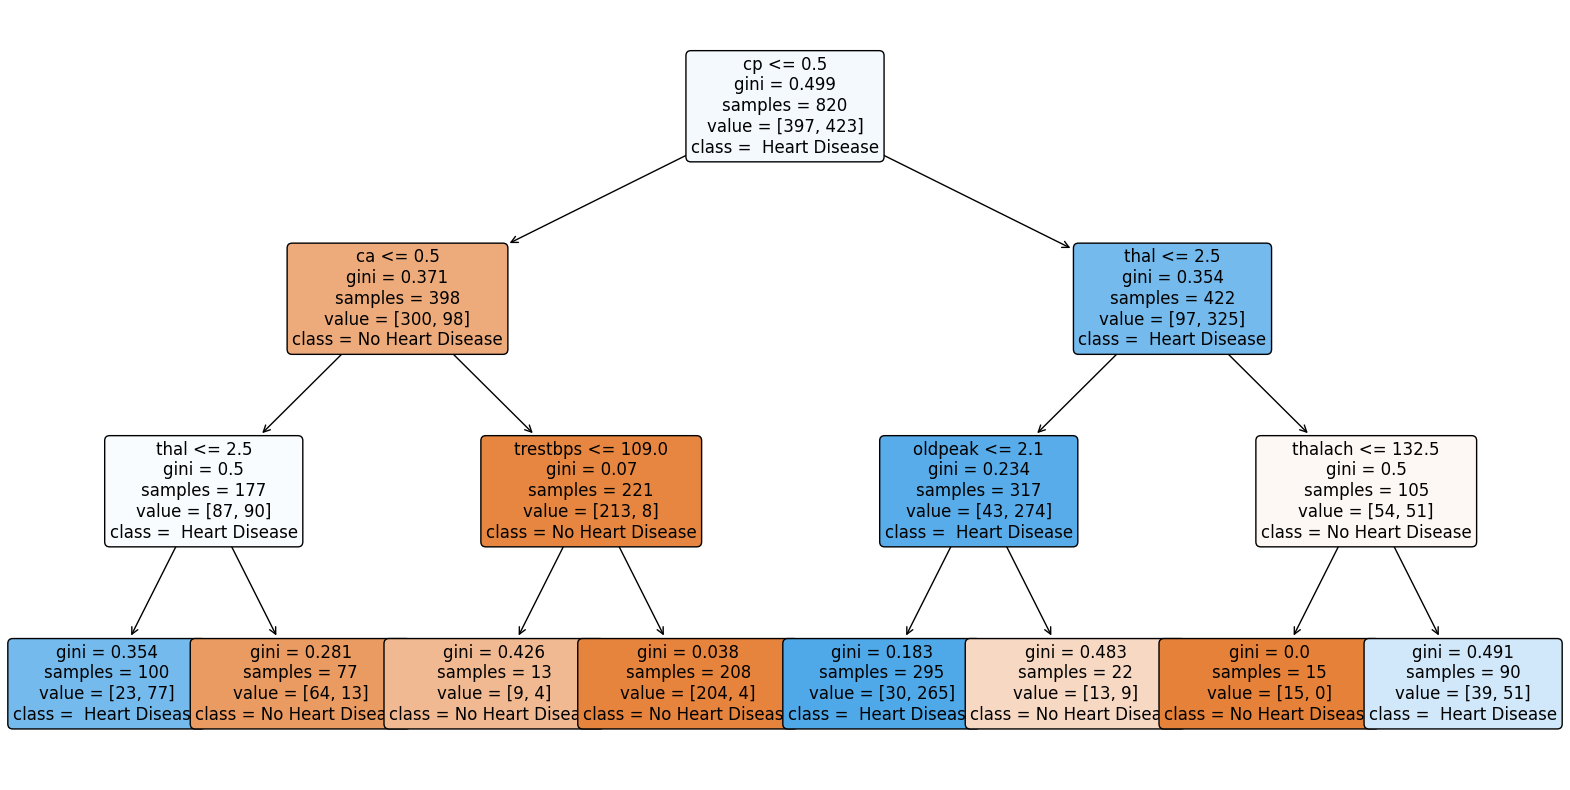

Decision Tree with max_depth=5, min_samples_split=2, min_samples_leaf=1
Accuracy: 0.8439
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.74      0.82       102
           1       0.78      0.95      0.86       103

    accuracy                           0.84       205
   macro avg       0.86      0.84      0.84       205
weighted avg       0.86      0.84      0.84       205



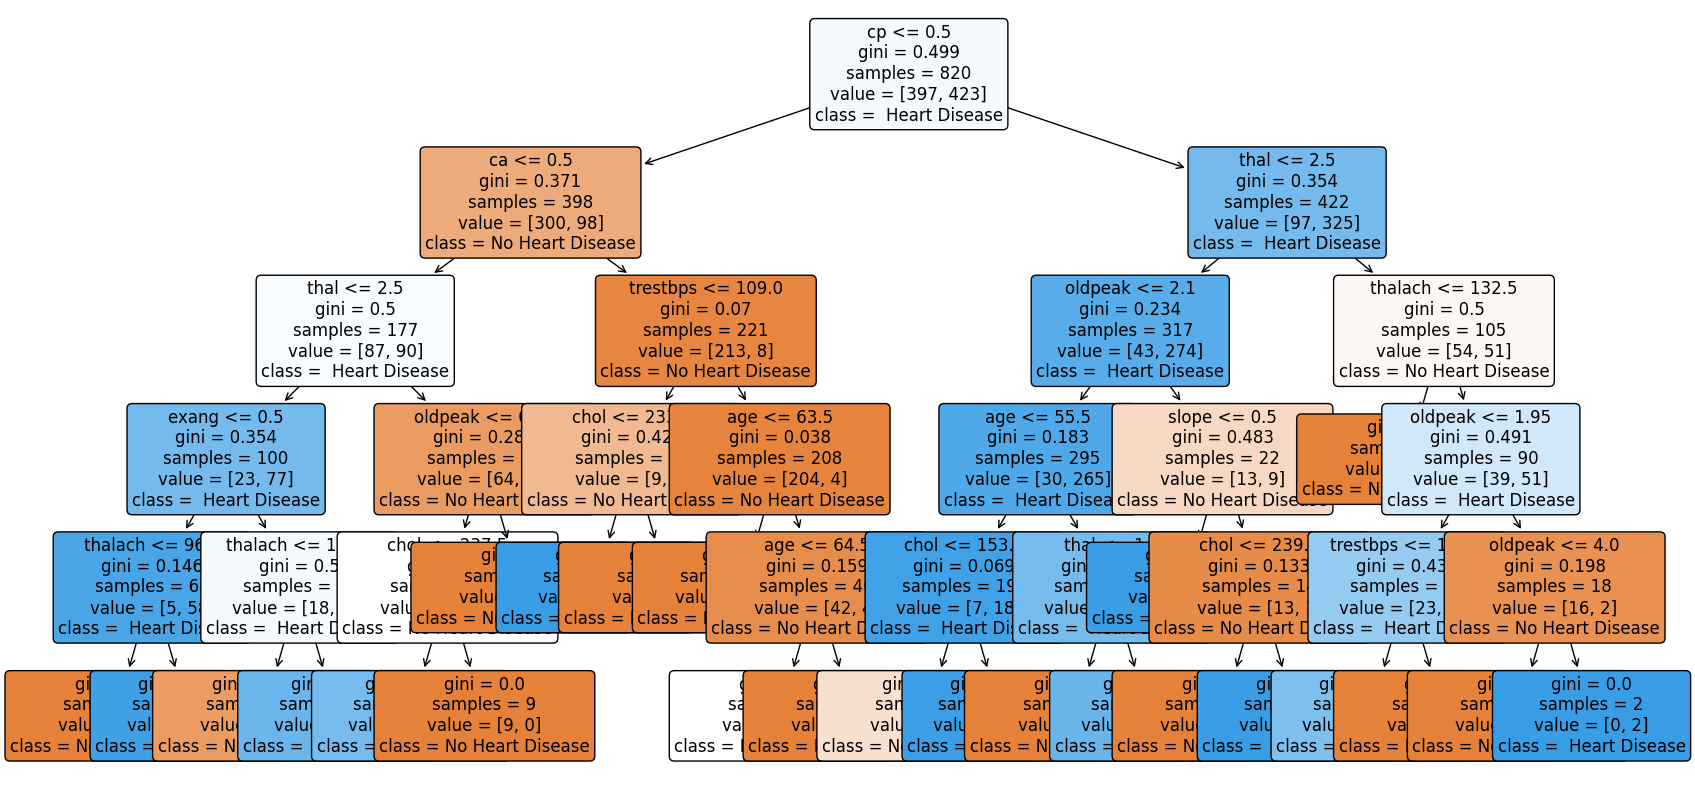

Decision Tree with max_depth=15, min_samples_split=2, min_samples_leaf=1
Accuracy: 0.9854
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



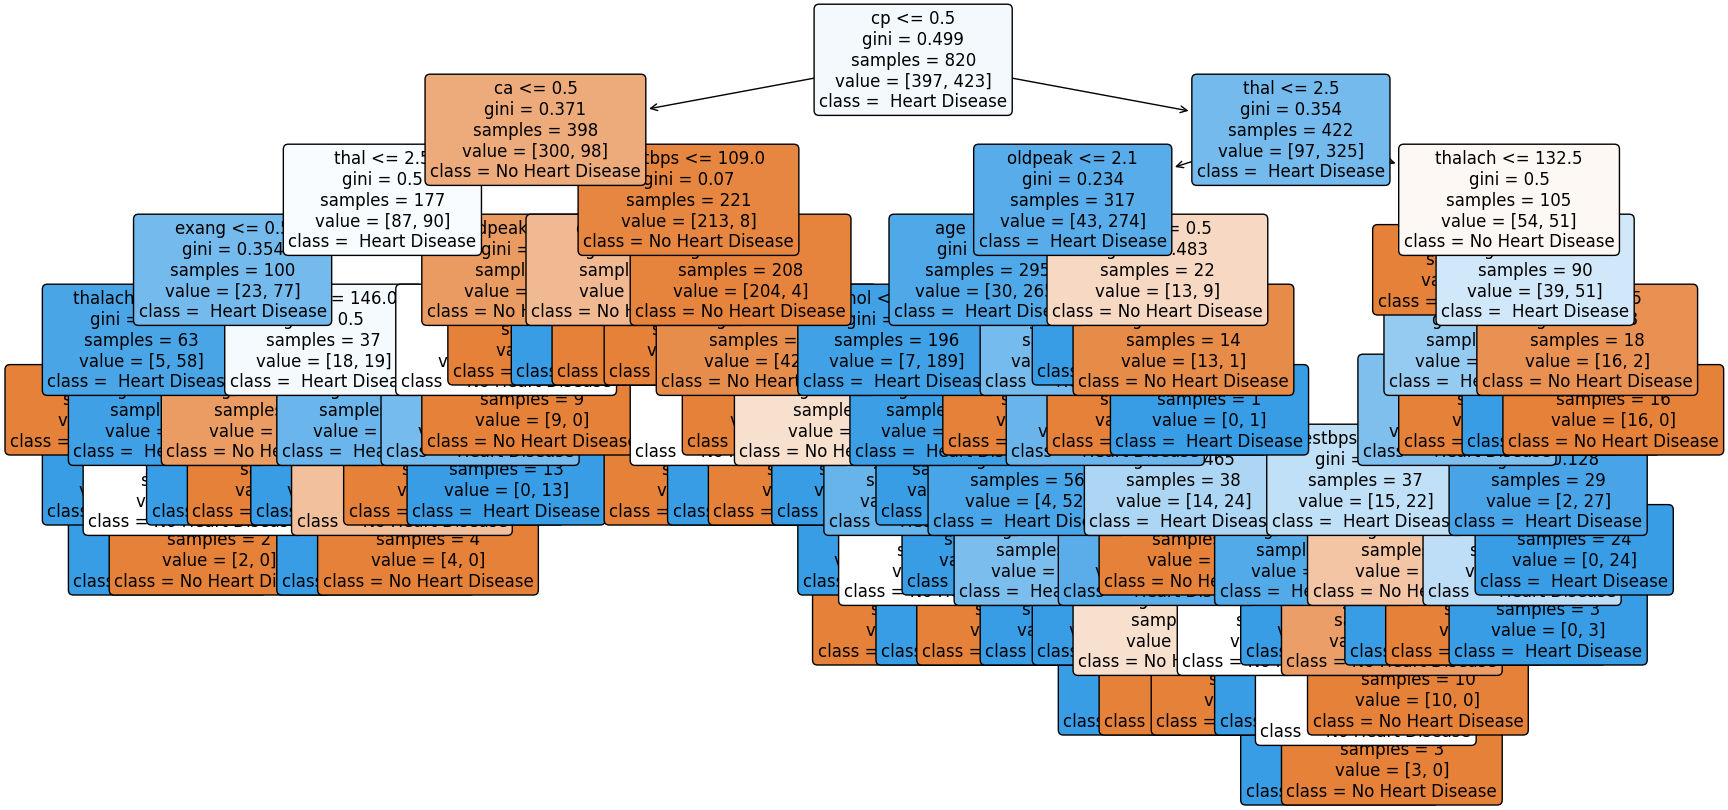

In [16]:
#Plotting decision tree
def plot_dt(clf, feature_names, class_names, figsize=(20,10)):
    plt.figure(figsize=figsize)
    tree.plot_tree(
        clf,
        feature_names=feature_names,
        class_names=class_names,
        filled=True,
        rounded=True,
        fontsize=12
    )
    plt.show()

#Defining class names based on the target (Heart Disease or Not)
class_names = ['No Heart Disease', ' Heart Disease']

#Parameter settings to visualize
parameter_settings = [
    {'max_depth': 3},
    {'max_depth': 5},
    {'max_depth': 15}
]

#Training and plotting trees with different settings
for params in parameter_settings:
    clf = train_evaluate_decision_tree(
        max_depth=params.get('max_depth'),
        min_samples_split=params.get('min_samples_split', 2),
        min_samples_leaf=params.get('min_samples_leaf', 1)
    )
    plot_dt(clf, feature_names=X.columns, class_names=class_names)


Comments about Decision Tree:

Something to note here would be that with a max_depth of three the tree continues to be shallow. As the max depth increases there can be chances of overfitting, but the recall, f1-score, and precision continue to increase as the tree increases.

Sensitivity Analysis: Permutation

I've read up on Sensitivity Analysis from this blog:
https://medium.com/@einat_93627/understand-your-black-box-model-using-sensitivity-analysis-practical-guide-ef6ac4175e55

In this blog they discuss that there are two ways to go about sensitivity analysis. It talks about how it is important to keep track of features that are important within the dataset.

One way they can go about this is by doing uniform distribution. To go about this they replace the feature values with possible feature values while giivng uniform probability.

Their second transformation idea was about permutation. The blog states that it is taking the real distribution of the feature values within the data. They describe how this approach helps as the entire data is consiered when doing this approach.

They also discuss how missing values is another option on how to see how features affect the model.

For this, I am using permutation.

Decision Tree with max_depth=5, min_samples_split=2, min_samples_leaf=1
Accuracy: 0.8439
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.74      0.82       102
           1       0.78      0.95      0.86       103

    accuracy                           0.84       205
   macro avg       0.86      0.84      0.84       205
weighted avg       0.86      0.84      0.84       205



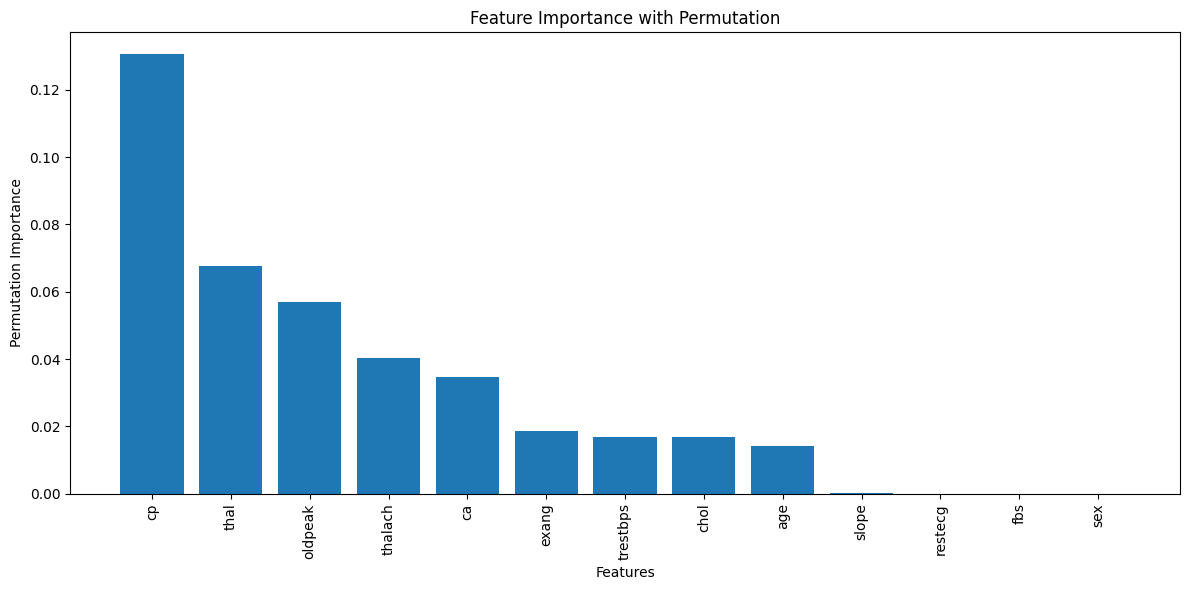

Top 2 important features: ['cp' 'thal']


In [25]:
#Computing and plotting permutation importance with this def
def plot_permutation_importance(clf, X_test, y_test, feature_names, top_n=2):
    #Measuring performance for decision tree
    result = permutation_importance(
        clf, X_test, y_test, n_repeats=30, random_state=42, n_jobs=-1
    )
    #Making an array of mean permutation importances for each feature in descending order
    sorted_idx = result.importances_mean.argsort()[::-1]
    #Plotting
    plt.figure(figsize=(12,6))
    plt.bar(range(len(feature_names)), result.importances_mean[sorted_idx], align='center')
    plt.xticks(range(len(feature_names)), np.array(feature_names)[sorted_idx], rotation=90)
    plt.ylabel("Feature Importace")
    plt.xlabel("Features")
    plt.title("Feature Importance using Permutation")
    plt.tight_layout()
    plt.show()

    #Grabbing the top two features that are being measured
    top_feats = np.array(feature_names)[sorted_idx][:top_n]
    print(f"Top 2 important features are: {top_feats}")
    return top_feats

#Using the model with max_depth=5 and evaluating the decision tree
clf_depth5 = train_evaluate_decision_tree(max_depth=5)
#Plotting the Permutation from the def which shows the feature importance
top_feats = plot_permutation_importance(
    clf_depth5, X_test, y_test, feature_names=X.columns, top_n=2
)


Task 2 (30 points): From the Bagging and Boosting ensemble methods pick any one algorithm
from each category. Implement both the algorithms using the same data.
1. Use stratified k-fold cross-validation with at least three different folds (e.g., 5, 10, 15).
You may do your own research on this technique (include citations).
2. Evaluate the models using any three-evaluation metrics of your choice (e.g. accuracy,
Precision, F1-score etc.).
3. Comment on the behavior of each algorithm under the metrics. Does the performance
ranking change based on the metric used? Why?

Learning about bagging and boosting from this link provided: https://www.geeksforgeeks.org/bagging-vs-boosting-in-machine-learning/

It speaks of what bagging is. According to the site it says that the goal of baggins is to decrease variance to avoid overfitting, typically applied with decision trees. The overall idea behind it based on the site is that it takes all the data and splits it evenly. From there the model is being learned in parallel to each split set while combining the predictions at the end. To add, they desceribe an example using a Random Forest Classifier model which is what I have used below.

In terms of boosting, they decribe the idea behind that as well by saying how models are trained and while mistakes are happening, they update and try to fix the mistakes being made. When a data gets a higher weight it was probably because it had been misclassified versus a datapoint that may be getting a lower weight(classified correctly). The sample idea that they have given was on AdaBoost which was used in this example. They state how it takes the weak classifiers and classifes them and increases their weights.

In [30]:
#Bagging: Random Forest Classifier
rf_clf = RandomForestClassifier(
    #Number of trees
    n_estimators=100,
    #Let trees grow until all leaves are pure
    max_depth=None,
    random_state=42
)

#--------------------------------------------------------------------

#Boosting: AdaBoost Classifier
ada_clf = AdaBoostClassifier(
    #Number of weak learners
    n_estimators=100,
    #Weight applied to each classifier at each boosting iteration
    learning_rate=1.0,
    random_state=42
)



#To use later for the last part so they give close results

#Initializig a Decision Tree Classifier for cross-validation
dt_cv_clf = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)




In [28]:
#K-Fold
#Defining the num of folds to try
folds = [5, 10, 15]

#Defining Stratified K-Fold Cross-Validation
def get_stratified_kfold(n_splits):
    return StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

#Defining evaluation metrics
score = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'f1': make_scorer(f1_score)}

#Creating a dictionary for results later on
results = {
    'Model': [],
    'Fold': [],
    'Accuracy': [],
    'Precision': [],
    'F1-Score': []
}

#Performing cross-validation and collecting results
def evaluate_model(model, model_name):
    for n_splits in folds:
        skf = get_stratified_kfold(n_splits)
        cv_results = cross_validate(
            model, X, y,
            cv=skf,
            scoring=score,
            return_train_score=False
        )
        #Storing the average scores from the dictionary made
        results['Model'].append(model_name)
        results['Fold'].append(n_splits)
        results['Accuracy'].append(np.mean(cv_results['test_accuracy']))
        results['Precision'].append(np.mean(cv_results['test_precision']))
        results['F1-Score'].append(np.mean(cv_results['test_f1']))

        #Printing for each model and type of fold
        print(f"{model_name} with {n_splits}-fold CV:")
        print(f"  Accuracy: {np.mean(cv_results['test_accuracy']):.4f}")
        print(f"  Precision: {np.mean(cv_results['test_precision']):.4f}")
        print(f"  F1-Score: {np.mean(cv_results['test_f1']):.4f}\n")

#Evaluating Random Forest
evaluate_model(rf_clf, 'Random Forest')

#Evaluating AdaBoost
evaluate_model(ada_clf, 'AdaBoost')

#Evaluating Decision Tree
evaluate_model(dt_cv_clf, 'Decision Tree')

Random Forest with 5-fold CV:
  Accuracy: 0.9961
  Precision: 1.0000
  F1-Score: 0.9961

Random Forest with 10-fold CV:
  Accuracy: 1.0000
  Precision: 1.0000
  F1-Score: 1.0000

Random Forest with 15-fold CV:
  Accuracy: 1.0000
  Precision: 1.0000
  F1-Score: 1.0000

AdaBoost with 5-fold CV:
  Accuracy: 0.9268
  Precision: 0.9370
  F1-Score: 0.9280

AdaBoost with 10-fold CV:
  Accuracy: 0.9268
  Precision: 0.9372
  F1-Score: 0.9281

AdaBoost with 15-fold CV:
  Accuracy: 0.9258
  Precision: 0.9405
  F1-Score: 0.9267

Decision Tree with 5-fold CV:
  Accuracy: 0.9044
  Precision: 0.8778
  F1-Score: 0.9106

Decision Tree with 10-fold CV:
  Accuracy: 0.9033
  Precision: 0.8847
  F1-Score: 0.9080

Decision Tree with 15-fold CV:
  Accuracy: 0.9053
  Precision: 0.8891
  F1-Score: 0.9103



Comments on Results:

With the results given, random forest seems to achieve almost perfect accuracy and f-1 score during each fold configuration. The precision stays perfectly consistent across the three trials.

For the AdaBoost, it has also shown to be consistently high as well. The precision, though, has higher results than the accuracy which could mean there is some false positive rate occurring in there. In terms of the F-1 Score, it has also decreased a bit.

In terms of the decision tree scores, the accuracy has done slightly lower versus the other methods. The precision has also been low which could illusrate a possible high false positive rate. The F-1 Score has remained low as well.

Task 3 (40 points): Compare the effectiveness of the three models implemented above. Analyze
the results using the following:
1. A confusion matrix for one selected test fold.
2. A statistical test (e.g., paired t-test) to determine if differences between models are
significant.
3. A discussion on the trade-off between bias and variance for each model.

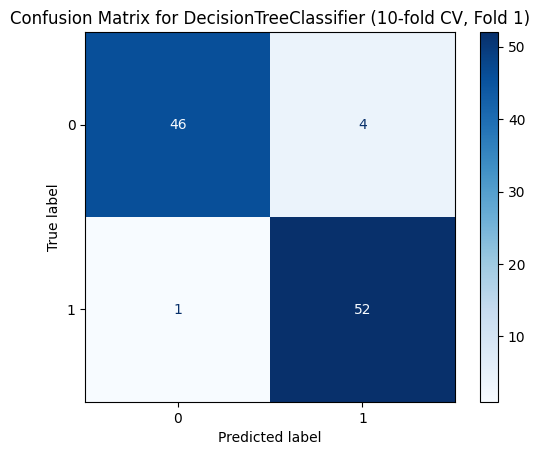

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.98      0.92      0.95        50
     Disease       0.93      0.98      0.95        53

    accuracy                           0.95       103
   macro avg       0.95      0.95      0.95       103
weighted avg       0.95      0.95      0.95       103



In [12]:
#Confusion Matrix for One Selected Test Fold

#Selecting model and fold
#Decision Tree
selected_model = clf_depth5
#10-fold CV
selected_n_splits = 10


#Init Stratified K-Fold
skf = StratifiedKFold(n_splits=selected_n_splits, shuffle=True, random_state=42)

#Iterating through folds to select the first fold
for fold_index, (train_index, test_index) in enumerate(skf.split(X, y)):
    #Selecting first fold to see how the model is performing on unseen data
    if fold_index == 0:
        X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
        break

#Training selected model on the training fold
selected_model.fit(X_train_fold, y_train_fold)

#Predicting on the test fold
y_pred_fold = selected_model.predict(X_test_fold)

#Generating confusion matrix
cm = confusion_matrix(y_test_fold, y_pred_fold)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=selected_model.classes_)

#Plotting confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix for {selected_model.__class__.__name__} (10-fold CV, Fold 1)')
plt.show()

#Printing classification report
print("Classification Report:")
print(classification_report(y_test_fold, y_pred_fold, target_names=['No Disease', 'Disease']))


Comments on K-Fold:
I have looked more into K-Fold using this site https://www.geeksforgeeks.org/stratified-k-fold-cross-validation/

It illustrates how it works by talking about how to sample from a population of people. They talk about how the distribution of peole (men versus female) can affect the data especially if there is a larger percentage of one the male or female. They also describe how there is no effectiveness in taking a random sample of people versus having a strategy in which one tries certain parameters to achieve an optimal model that has efficiency.

In [21]:
#Doing T-test

#Converting results to dataframe from before^
results_df = pd.DataFrame(results)

#Pivoting data to have models as columns and folds as rows
pivot_df = results_df.pivot(index='Fold', columns='Model', values=['Accuracy', 'Precision', 'F1-Score'])
print("\nPivoted Cross-Validation Results:")
print(pivot_df)

#Defining the models and metrics
models = ['Decision Tree', 'Random Forest', 'AdaBoost']
metrics = ['Accuracy', 'Precision', 'F1-Score']

#Performing paired t-test between two models for a given metric
def perform_paired_ttest(pivot_df, model1, model2, metric):
    try:
        #Accessing the data using tuple indexing for multi-index
        data_model1 = pivot_df.loc[:, (metric, model1)]
        data_model2 = pivot_df.loc[:, (metric, model2)]

        #Performing paired t-test
        t_stat, p_val = ttest_rel(data_model1, data_model2)

        print(f"Paired t-test between {model1} and {model2} for {metric}:")
        print(f"t-statistic = {t_stat:.4f}, p-value = {p_val:.4f}")

        #Interpretating results
        if p_val < 0.05:
            print("Statistically very different.\n")
        else:
            print("Not very statistically different.\n")
    except KeyError as e:
        print(f"Models dont match")

#Performing t-tests for all pairs and metrics
for metric in metrics:
    print(f"{metric}:")
    for i in range(len(models)):
        for j in range(i+1, len(models)):
            perform_paired_ttest(pivot_df, models[i], models[j], metric)



Pivoted Cross-Validation Results:
       Accuracy                             Precision                \
Model  AdaBoost Decision Tree Random Forest  AdaBoost Decision Tree   
Fold                                                                  
5      0.926829      0.904390      0.996098  0.937037      0.877768   
10     0.926794      0.903303      1.000000  0.937192      0.884685   
15     0.925774      0.905257      1.000000  0.940454      0.889091   

                     F1-Score                              
Model Random Forest  AdaBoost Decision Tree Random Forest  
Fold                                                       
5               1.0  0.928022      0.910614      0.996117  
10              1.0  0.928112      0.907965      1.000000  
15              1.0  0.926741      0.910276      1.000000  
Accuracy:
Paired t-test between Decision Tree and Random Forest for Accuracy:
t-statistic = -65.0168, p-value = 0.0002
Statistically very different.

Paired t-test between Decisi

Discussion of Tradeoff:
Based on the models, the trade-off for a decision tree is to have a low bias if the tree is deep with high variance. The impact this has is that it can lower the performance compared to the others and can be sensitive to data splits.

The trade-off of the random forest that it maintains a low bias while reducing the variance with bagging and feature randomness. This can impact the results because as it can achieve the best scores illustrating how strong it works while having low variance.

The Ada boost focuses on reducing bias iteratively as it corrects the previous errors but can also be prone to variance increases if the data has some outliers. The effect it has on its results is that it is stronger than a single decision tree but can compare to random forest in terms of its reduction in the variance.


Task 4 (50 points): For the same classification problem solved above, implement the XGBoost
algorithm. If you picked XGBoost as one of the boosting algorithms in task 2, you may use the
same implementation. Implement and evaluate XGBoost with the following requirements:
1. Perform a grid search or random search over at least 3 hyperparameters, such as
learning rate, max depth, and subsample.
2. Analyze the sensitivity of your model to changes in these parameters.
Optional (no points taken off if not done) - Create plots to show the effect of each
parameter on accuracy and another metric.

Task 4: Question 1

In [31]:
#XGBoost Classifier
xgb_clf = xgb.XGBClassifier(
    #Disable the use of label encoder to suppress warnings
    use_label_encoder=False,
    #Set evaluation metric to logloss
    eval_metric='logloss',
    #For reproducibility
    random_state=42
)

#Defining the hyperparameter grid for grid search coming up
param_grid = {
    #Step size shrinkage
    'learning_rate': [0.01, 0.1, 0.2],
    #Maximum tree depth
    'max_depth': [3, 5, 7, 9, 11],
    #Subsample ratio of the training instances
    'subsample': [0.4, 0.6, 0.8, 1.0]
}


#Defining Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Grid Searching
grid_search = GridSearchCV(
    estimator=xgb_clf,
    #Using parameters that have been described above
    param_grid=param_grid,
    scoring='accuracy',
    cv=skf,
    #Utilizing all available cores
    n_jobs=-1,
    #Log Details
    verbose=2
)

#Performing Grid Search
print("Starting Grid Search for XGBoost...")
grid_search.fit(X_train, y_train)
print("Grid Search completed.")



Starting Grid Search for XGBoost...
Fitting 5 folds for each of 60 candidates, totalling 300 fits


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Grid Search completed.


In [32]:
#Getting best parameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")
#Finding the best score
best_score = grid_search.best_score_
print(f"Best Cross-Validated Accuracy: {best_score:.4f}")
#Getting best estimator
best_xgb_clf = grid_search.best_estimator_


#Fitting the best model on the entire training data
best_xgb_clf.fit(X_train, y_train)
#Predicting on the test set
y_pred_xgb = best_xgb_clf.predict(X_test)

#Calculating evaluation metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print("\nXGBoost Performance for Test Set:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"F1-Score: {f1_xgb:.4f}")

#Displaing the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=['No Disease', 'Disease']))

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 9, 'subsample': 1.0}
Best Cross-Validated Accuracy: 0.9829

XGBoost Performance for Test Set:
Accuracy: 0.9854
Precision: 1.0000
F1-Score: 0.9852

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.97      1.00      0.99       102
     Disease       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



Analsysis of the HyperParameters being used:

When the learning rate is large, XGBoost could overfit whch can cause higher variance in the model which could root this instability.
When the learning rate is low, it can ask for more boosting rounds to be able to converge properly. If there are not enough rounds, the data may be seen as underfitting.
Within the grid search, 0.1 can be seen as the most optimal meaning that the learning is fast without causing the overfitting.

In terms of Max Depth, the second parameter, there are some observations to be made as well. The deeper trees, that go over 7, can capture complex relationships, but there could be some overfitting happening there. The trees that are smaller can reduce the variance but could also be underfitting the data. The optimal number for this was 9 which could be because the data has enough complexity that the model is benefitting from slightly deep trees but not very deep.

The subsample is the last hyperparameter to be looked at. When there is a higher subsample it seems that XGB uses most or all training samples for each tree which could cause overfitting. When there is a lower subsample, it can reduce the variance and sometimes help with generalization but as stated, there could be some underfitting happening as well. Their optimal amount which is 1.0, shows that it is helping to avoid overfitting and improves the generalization.

With this understanding, it is telling that XGBBoost could work well, but can be sensitive to very small changes within the hyperparameters.
I could tell this too because I was adding and eliminated the hyperparameters and it had changed the best optimal values.
